In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import fastf1

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')



pandas_extensions    WARNING 	Import of pandas internals failed
Traceback (most recent call last):
  File "/Users/danielcavalluzzo/opt/anaconda3/lib/python3.8/site-packages/fastf1/internals/pandas_extensions.py", line 9, in <module>
    from pandas.core.internals.construction import \
ImportError: cannot import name 'BlockPlacement' from 'pandas.core.internals.construction' (/Users/danielcavalluzzo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/internals/construction.py)


# Getting a feel for the data

In [2]:

#Establish Session
session = fastf1.get_session(2023, 'Mexico', 'R')
session.load(telemetry=True)

# Pick Fastest lap of Session
fast_verstappen = session.laps.pick_driver('RUS').pick_fastest()
car_data_ver = fast_verstappen.get_telemetry()

car_data_ver.head()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/danielcavalluzzo/Library/Caches/fastf1.
	Size: 8.56 GB
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2023-10-29 21:19:18.144,0 days 02:18:18.063000,,36.103056,0 days 00:00:00,11474,254,6,100,False,1,interpolation,0.145909,0.000034,OnTrack,-112,1201,22270
3,2023-10-29 21:19:18.292,0 days 02:18:18.211000,,36.103056,0 days 00:00:00.148000,11280,257,6,100,False,1,pos,10.865707,0.002563,OnTrack,-23,1189,22271
4,2023-10-29 21:19:18.505,0 days 02:18:18.424000,,36.103056,0 days 00:00:00.361000,10892,262,7,100,False,1,car,26.492222,0.006250,OnTrack,98,1170,22271
5,2023-10-29 21:19:18.711,0 days 02:18:18.630000,,36.103056,0 days 00:00:00.567000,10987,264,7,100,False,1,pos,41.828007,0.009867,OnTrack,221,1150,22271
6,2023-10-29 21:19:18.892,0 days 02:18:18.811000,,36.103056,0 days 00:00:00.748000,11083,266,7,100,False,1,pos,55.405117,0.013070,OnTrack,352,1128,22271


# Throttle through Qual (Per vs Ver)

core           INFO 	Loading data for Mexico City Grand Prix - Qualifying [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '3', '11', '44', '81', '63', '77', '24', '10', '27', '14', '23', '22', '31', '20', '18', '4', '2']


<Figure size 1080x360 with 0 Axes>

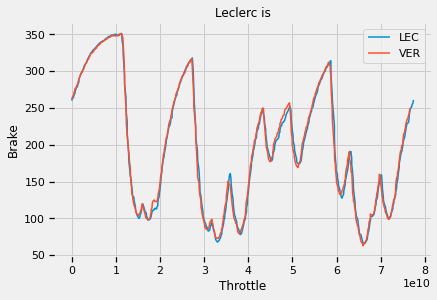

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

In [3]:
# Get telemetry data for the 2023 Mexico Grand Prix Qualifying session
session = fastf1.get_session(2023, 'Mexico', 'Q')
session.load(telemetry=True)

# Get the fastest laps for Charles Leclerc and Max Verstappen
fast_leclerc = session.laps.pick_driver('PER').pick_fastest()
fast_verstappen = session.laps.pick_driver('VER').pick_fastest()

# Get telemetry data for both drivers
car_data_lec = fast_leclerc.get_telemetry()
car_data_ver = fast_verstappen.get_telemetry()

# Set time limits for the first 30 seconds of the session
t_limit_upper = pd.to_timedelta(85, unit='s')
t_limit_lower = pd.to_timedelta(0, unit='s')

# Filter telemetry data for the first 30 seconds
car_data_lec_first_30s = car_data_lec[(car_data_lec['Time'] <= t_limit_upper) & (car_data_lec['Time'] >= t_limit_lower)]
car_data_ver_first_30s = car_data_ver[(car_data_ver['Time'] <= t_limit_upper) & (car_data_lec['Time'] >= t_limit_lower)]

# Extract time and speed data for plotting
t = car_data_lec_first_30s['Time']
vCar = car_data_lec_first_30s['Speed']

t1 = car_data_ver_first_30s['Time']
vCar1 = car_data_ver_first_30s['Speed']

# Calculate average speeds for both drivers
avg_v_lec = vCar.mean()
avg_v_ver = vCar1.mean()


# Create a plot to compare the speeds of Leclerc and Verstappen
# Note: The correct position for the figsize line is before calling plt.subplots()
plt.figure(figsize=(15, 5))
fig, ax = plt.subplots()

# Plot the speed data for both drivers
ax.plot(t, vCar, label='LEC')
ax.plot(t1, vCar1, label='VER')

# Set labels and title for the plot
ax.set_xlabel('Throttle')
ax.set_ylabel('Brake')
ax.set_title('Leclerc is')

# Display legend
ax.legend()

# Show the plot
plt.show()

# Display the columns of the telemetry data for Leclerc
car_data_lec.columns

# Brake of Perez Qual vs Race 

core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']
core           INFO 	Loading data for Mexico City Grand Pr

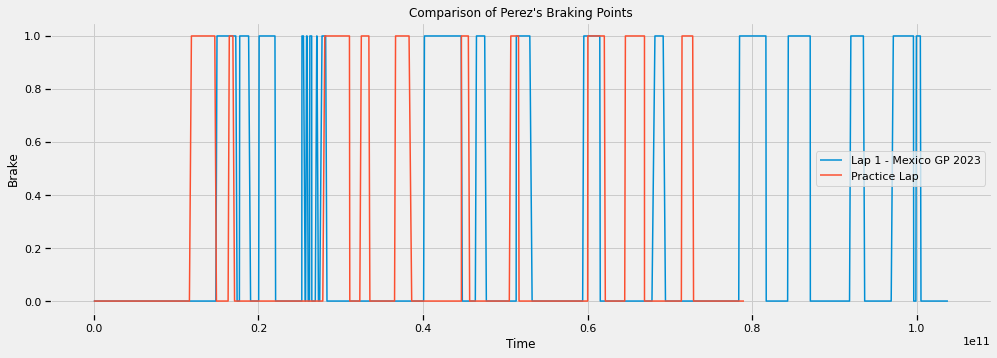

In [4]:
# Get telemetry data for the Mexico GP 2023 Qualifying session
session_gp = fastf1.get_session(2023, 'Mexico', 'R')
session_gp.load(telemetry=True)

# Get telemetry data for one of Perez's practice laps
session_practice = fastf1.get_session(2023, 'Mexico', 2)
session_practice.load(telemetry=True)

# Get the fastest lap telemetry for both sessions
lap_gp = session_gp.laps.pick_driver('PER').pick_lap(1)
lap_practice = session_practice.laps.pick_driver('PER').pick_fastest()

# Get telemetry data for both laps
telemetry_data_gp = lap_gp.get_telemetry()
telemetry_data_practice = lap_practice.get_telemetry()

# Plot braking points for lap 1 of the Mexico GP 2023
plt.figure(figsize=(15, 5))
plt.plot(telemetry_data_gp['Time'], telemetry_data_gp['Brake'], label='Lap 1 - Mexico GP 2023')

# Plot braking points for a practice lap
# You can customize this part based on the data available for the practice lap
plt.plot(telemetry_data_practice['Time'], telemetry_data_practice['Brake'], label='Practice Lap')

# Set labels and title for the plot
plt.xlabel('Time')
plt.ylabel('Brake')
plt.title('Comparison of Perez\'s Braking Points')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Brake through GP (Per vs Lec)

core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']


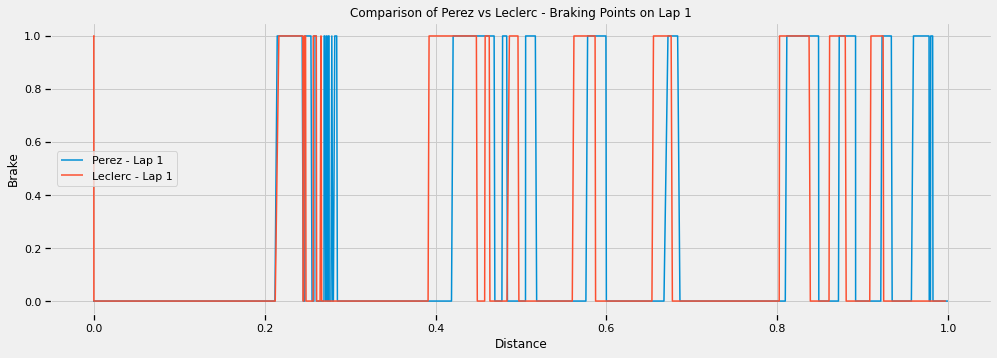

In [5]:
# Get telemetry data for the Mexico GP 2023 Qualifying session
session_gp = fastf1.get_session(2023, 'Mexico', 'R')
session_gp.load(telemetry=True)

# Get telemetry data for lap 1 of Sergio Perez and Charles Leclerc in the Mexico GP 2023
lap_perez = session_gp.laps.pick_driver('PER').pick_lap(1)
lap_leclerc = session_gp.laps.pick_driver('LEC').pick_lap(1)

# Get telemetry data for both drivers on lap 1
telemetry_data_perez = lap_perez.get_telemetry()
telemetry_data_leclerc = lap_leclerc.get_telemetry()

# Plot braking points for lap 1 of Sergio Perez and Charles Leclerc
plt.figure(figsize=(15, 5))
plt.plot(telemetry_data_perez['RelativeDistance'], telemetry_data_perez['Brake'], label='Perez - Lap 1')
plt.plot(telemetry_data_leclerc['RelativeDistance'], telemetry_data_leclerc['Brake'], label='Leclerc - Lap 1')

# Set labels and title for the plot
plt.xlabel('Distance')
plt.ylabel('Brake')
plt.title('Comparison of Perez vs Leclerc - Braking Points on Lap 1')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Brake & Position through GP (Per vs Lec)

In [6]:
# Get telemetry data for the Mexico GP 2023 Qualifying session
session_gp = fastf1.get_session(2023, 'Mexico', 'R')
session_gp.load(telemetry=True)

# Get telemetry data for lap 1 of Sergio Perez and Charles Leclerc in the Mexico GP 2023
lap_perez = session_gp.laps.pick_driver('PER').pick_lap(1)
lap_leclerc = session_gp.laps.pick_driver('LEC').pick_lap(1)

# Get telemetry data for both drivers on lap 1
telemetry_data_perez = lap_perez.get_telemetry()
telemetry_data_leclerc = lap_leclerc.get_telemetry()

core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']


-1000


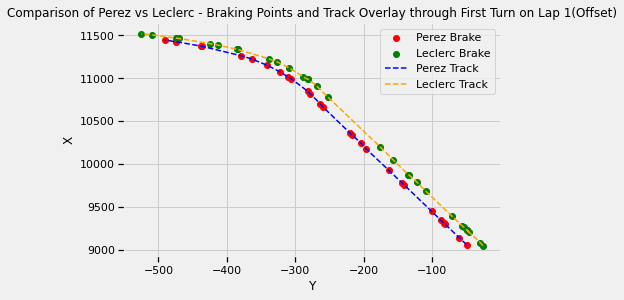

In [7]:
# Define 'X' and 'Y' range for the first turn
first_turn_x_range = [9000, 11500]  # Define the actual values based on the track layout
first_turn_y_range = [-1000, 0]  # Define the actual values based on the track layout

print(first_turn_y_range[0])

# Filter telemetry data for Sergio Perez through the first turn
telemetry_data_perez_first_turn = telemetry_data_perez[
    (telemetry_data_perez['X'] >= first_turn_x_range[0]) & (telemetry_data_perez['X'] <= first_turn_x_range[1]) &
    (telemetry_data_perez['Y'] >= first_turn_y_range[0]) & (telemetry_data_perez['Y'] <= first_turn_y_range[1])
]

# Filter telemetry data for Charles Leclerc through the first turn
telemetry_data_leclerc_first_turn = telemetry_data_leclerc[
    (telemetry_data_leclerc['X'] >= first_turn_x_range[0]) & (telemetry_data_leclerc['X'] <= first_turn_x_range[1]) &
    (telemetry_data_leclerc['Y'] >= first_turn_y_range[0]) & (telemetry_data_leclerc['Y'] <= first_turn_y_range[1])
]

# Offset values for diagonal visualization
offset_x_leclerc = telemetry_data_leclerc_first_turn['X'] + 20
offset_y_leclerc = telemetry_data_leclerc_first_turn['Y'] + 20

# Scatter plot for braking points through the first turn
plt.scatter(telemetry_data_perez_first_turn['Y'], telemetry_data_perez_first_turn['X'],
            marker='o', color='red', label='Perez Brake')
plt.scatter(offset_y_leclerc, offset_x_leclerc,
            marker='o', color='green', label='Leclerc Brake')

# Plot track map
plt.plot(telemetry_data_perez_first_turn['Y'], telemetry_data_perez_first_turn['X'], label='Perez Track', linestyle='--', color='blue')
plt.plot(offset_y_leclerc, offset_x_leclerc, label='Leclerc Track', linestyle='--', color='orange')

# Set labels and title for the plot
plt.xlabel('Y')
plt.ylabel('X')
plt.title('Comparison of Perez vs Leclerc - Braking Points and Track Overlay through First Turn on Lap 1(Offset)')

# Display legend
plt.legend()

# Show the plot
plt.show()

core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '16', '55', '4', '63', '3', '81', '23', '31', '10', '22', '27', '24', '77', '2', '18', '14', '20', '11']


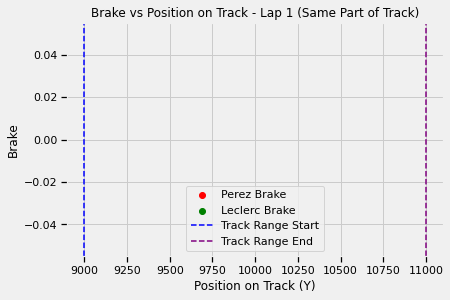

In [8]:
# Get telemetry data for the Mexico GP 2023 Race session
session_race = fastf1.get_session(2023, 'Mexico', 'R')
session_race.load(telemetry=True)

# Get telemetry data for lap 1 of Sergio Perez and Charles Leclerc
lap_perez = session_race.laps.pick_driver('PER').pick_lap(1)
lap_leclerc = session_race.laps.pick_driver('LEC').pick_lap(1)

# Get telemetry data for both drivers on lap 1
telemetry_data_perez = lap_perez.get_telemetry()
telemetry_data_leclerc = lap_leclerc.get_telemetry()

# Filter telemetry data for the same part of the track
# Adjust the range based on your specific scenario
track_range = (9000, 11000)

# Filter telemetry data for Sergio Perez
perez_filtered = telemetry_data_perez[
    (telemetry_data_perez['Y'] >= track_range[0]) & (telemetry_data_perez['Y'] <= track_range[1])
]

# Filter telemetry data for Charles Leclerc
leclerc_filtered = telemetry_data_leclerc[
    (telemetry_data_leclerc['Y'] >= track_range[0]) & (telemetry_data_leclerc['Y'] <= track_range[1])
]

# Plot brake vs position for both drivers
plt.scatter(perez_filtered['Y'], perez_filtered['Brake'], marker='o', color='red', label='Perez Brake')
plt.scatter(leclerc_filtered['Y'], leclerc_filtered['Brake'], marker='o', color='green', label='Leclerc Brake')

# Add vertical lines to indicate the track range
plt.axvline(x=track_range[0], color='blue', linestyle='--', label='Track Range Start')
plt.axvline(x=track_range[1], color='purple', linestyle='--', label='Track Range End')

# Set labels and title for the plot
plt.xlabel('Position on Track (Y)')
plt.ylabel('Brake')
plt.title('Brake vs Position on Track - Lap 1 (Same Part of Track)')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [9]:
all_final_positions = pd.DataFrame()
gasly_final_positions = pd.DataFrame()
albon_final_positions = pd.DataFrame()

## 2017 Races

In [10]:
# Define the years you're interested in
year_2017 = int(2017)
# Get the events for the specified year
events = fastf1.get_event_schedule(year_2017)
events.head()

# Create an empty list to store country names
country_list = []

# Iterate through rows of the DataFrame
for index, row in events.iterrows():
    # Check if "OfficialEventName" contains "GRAND PRIX"
    if "Grand Prix" in row["EventName"]:
        # Append the country name to the list
        country_list.append(row["EventName"])
            
race_list = len(country_list)
            
        
race_list_2017 = list(range(1, race_list + 1))

# Iterate over years and races
for X in race_list_2017:
    # Get the race session for the specified year and race
    race_session = fastf1.get_session(year_2017, X, 'R')
    race_session.load()

    # Get race results
    results = race_session.results

    # Filter results for Hamilton and Bottas
    hamilton_bottas_results = results[results['LastName'].isin(['Hamilton', 'Bottas'])]

    # Extract their final positions
    final_positions = hamilton_bottas_results[['LastName', 'Position']]

    # Add the 'Year' and 'Race' columns
    final_positions['Year'] = year_2017
    final_positions['Race'] = X

    # Append to the overall DataFrame
    all_final_positions = all_final_positions.append(final_positions, ignore_index=True)

# Display the final positions for all years and races
all_final_positions.info()
    
    

core           INFO 	Loading data for Australian Grand Prix - Race [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '77', '7', '33', '19', '11', '55', '26', '31', '27', '36', '2', '14', '20', '18', '3', '9', '30', '8']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading dat

core           INFO 	Finished loading data for 20 drivers: ['33', '44', '3', '5', '77', '11', '2', '18', '19', '31', '14', '20', '8', '10', '30', '27', '94', '9', '55', '7']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!
core        WARNING 	Cannot load laps, telemetry, weather, and message data because the relevant API is not supported for this session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '3', '77', '7', '31', '11', '20', '8', '19', '14', '30', '10', '2', '94', '18', '27', '9', '5', '55']
core           INFO 	Loading data for United States Grand Prix - Race [v3.1.6]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!

<class 'fastf1.core.SessionResults'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LastName  40 non-null     object 
 1   Position  40 non-null     float64
 2   Year      40 non-null     int64  
 3   Race      40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


# 2018 Races

In [11]:
year_2018 = int(2018)

# Get the events for the specified year
events = fastf1.get_event_schedule(year_2018)
events.head()

# Create an empty list to store country names
country_list = []

# Iterate through rows of the DataFrame
for index, row in events.iterrows():
    # Check if "OfficialEventName" contains "GRAND PRIX"
    if "Grand Prix" in row["EventName"]:
        # Append the country name to the list
        country_list.append(row["EventName"])
            
race_list = len(country_list)
            
        
race_list_2018 = list(range(1, race_list + 1))

# Iterate over years and races
for X in race_list_2018:
    # Get the race session for the specified year and race
    race_session = fastf1.get_session(year_2018, X, 'R')
    race_session.load()

    # Get race results
    results = race_session.results

    # Filter results for Hamilton and Bottas
    hamilton_bottas_results = results[results['LastName'].isin(['Hamilton', 'Bottas'])]

    # Extract their final positions
    final_positions = hamilton_bottas_results[['LastName', 'Position']]

    # Add the 'Year' and 'Race' columns
    final_positions['Year'] = year_2018
    final_positions['Race'] = X

    # Append to the overall DataFrame
    all_final_positions = all_final_positions.append(final_positions, ignore_index=True)

# Display the final positions
all_final_positions.info()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
core        WARNING 	Car position data is unavailable!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '44', '7', '3', '14', '33', '27', '77', '2', '55

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '7', '5', '8', '20', '31', '11', '14', '16', '9', '10', '55', '35', '18', '2', '44', '28', '3', '77', '27']
core           INFO 	Loading data for British Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
r

core           INFO 	Loading data for United States Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['7', '33', '44', '5', '77', '27', '55', '11', '28', '9', '2', '10', '35', '18', '16', '3', '8', '14', '31', '20']
core           INFO 	Loading data for Mexican Grand Prix -

<class 'fastf1.core.SessionResults'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LastName  82 non-null     object 
 1   Position  82 non-null     float64
 2   Year      82 non-null     int64  
 3   Race      82 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


# 2019 Races

In [12]:

year_2019 = int(2019)

# Get the events for the specified year
events = fastf1.get_event_schedule(year_2019)
events.head()

# Create an empty list to store country names
country_list = []

# Iterate through rows of the DataFrame
for index, row in events.iterrows():
    # Check if "OfficialEventName" contains "GRAND PRIX"
    if "Grand Prix" in row["EventName"]:
        # Append the country name to the list
        country_list.append(row["EventName"])
            
race_list = len(country_list)
            
        
race_list_2019 = list(range(1, race_list + 1))

# Iterate over years and races
for X in race_list_2019:
    # Get the race session for the specified year and race
    race_session = fastf1.get_session(year_2019, X, 'R')
    race_session.load()

    # Get race results
    results = race_session.results

    # Filter results for Hamilton, Bottas, and Gasly
    hamilton_bottas_results = results[results['LastName'].isin(['Hamilton', 'Bottas'])]
    gasly_results = results[results['LastName'].isin(['Gasly'])]
    albon_results = results[results['LastName'].isin(['Albon'])]
    verstappen_results = results[results['LastName'].isin(['verstappen'])]
    
    # Filter for Red Bull team
    gasly_results = gasly_results[gasly_results['TeamId'] == 'red_bull']
    albon_results = albon_results[albon_results['TeamId'] == 'red_bull']
    
    # Extract their final positions
    final_positions = hamilton_bottas_results[['LastName', 'Position']]
    gasly_positions = gasly_results[['LastName', 'Position']]
    albon_positions = albon_results[['LastName', 'Position']]
    verstappen_positions = albon_results[['LastName', 'Position']]
    
    # Add the 'Year' and 'Race' columns
    final_positions['Year'] = year_2019
    final_positions['Race'] = X
    
    gasly_positions['Year'] = year_2019
    gasly_positions['Race'] = X
    
    albon_positions['Year'] = year_2019
    albon_positions['Race'] = X
    
    # Append to the df
    all_final_positions = all_final_positions.append(final_positions, ignore_index=True)
    gasly_final_positions = gasly_final_positions.append(gasly_positions, ignore_index=True)
    albon_final_positions = albon_final_positions.append(albon_positions, ignore_index=True)

core           INFO 	Loading data for Australian Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '5', '16', '20', '27', '7', '18', '26', '10', '4', '11', '23', '99', '63', '88', '8', '3', '55']
core           INFO 	Loading data for Bahrain Grand Prix - R

req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '16', '77', '5', '44', '4', '10', '55', '7', '99', '11', '3', '27', '18', '23', '8', '26', '63', '20', '88']
core           INFO 	Loading data for British Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_message

core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '5', '77', '16', '23', '33', '11', '3', '10', '27', '26', '18', '55', '99', '20', '63', '8', '88', '7', '4']
core           INFO 	Loading data for United States Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req       

# 2020 Races

In [13]:

year_2020 = int(2020)

# Get the events for the specified year
events = fastf1.get_event_schedule(year_2020)
events.head()

# Create an empty list to store country names
country_list = []

# Iterate through rows of the DataFrame
for index, row in events.iterrows():
    # Check if "OfficialEventName" contains "GRAND PRIX"
    if "Grand Prix" in row["EventName"]:
        # Append the country name to the list
        country_list.append(row["EventName"])
            
race_list = len(country_list)
            
        
race_list_2020 = list(range(1, race_list + 1))

# Iterate over years and races
for X in race_list_2020:
    # Get the race session for the specified year and race
    race_session = fastf1.get_session(year_2020, X, 'R')
    race_session.load()

    # Get race results
    results = race_session.results

    # Filter results for Hamilton, Bottas, and Gasly
    hamilton_bottas_results = results[results['LastName'].isin(['Hamilton', 'Bottas'])]
    gasly_results = results[results['LastName'].isin(['Gasly'])]
    albon_results = results[results['LastName'].isin(['Albon'])]
    
    
    # Filter for Red Bull team
    gasly_results = gasly_results[gasly_results['TeamId'] == 'red_bull']
    
    # Extract their final positions
    final_positions = hamilton_bottas_results[['LastName', 'Position']]
    gasly_positions = gasly_results[['LastName', 'Position']]
    albon_positions = albon_results[['LastName', 'Position']]
    
    
    # Add the 'Year' and 'Race' columns
    final_positions['Year'] = year_2020
    final_positions['Race'] = X
    
    gasly_positions['Year'] = year_2020
    gasly_positions['Race'] = X
    
    albon_positions['Year'] = year_2020
    albon_positions['Race'] = X
    

    # Append to the df
    all_final_positions = all_final_positions.append(final_positions, ignore_index=True)
    gasly_final_positions = gasly_final_positions.append(gasly_positions, ignore_index=True)
    albon_final_positions = albon_final_positions.append(albon_positions, ignore_index=True)

# Display the final positions
all_final_positions.info()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  8: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '16', '4', '44', '55', '11', '10', '31', '99', '5', '6', '26', '23', '7', '63', '8', '20', '

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '23', '3', '11', '4', '26', '16', '7', '5', '63', '8', '18', '31', '6', '20', '99', '55', '33', '10']
core           INFO 	Loading data for Russian Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req     

<class 'fastf1.core.SessionResults'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LastName  157 non-null    object 
 1   Position  157 non-null    float64
 2   Year      157 non-null    int64  
 3   Race      157 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.0+ KB


# 2021 Races

In [14]:
year_2021 = int(2021)

# Get the events for the specified year
events = fastf1.get_event_schedule(year_2021)
events.head()

# Create an empty list to store country names
country_list = []

# Iterate through rows of the DataFrame
for index, row in events.iterrows():
    # Check if "OfficialEventName" contains "GRAND PRIX"
    if "Grand Prix" in row["EventName"]:
        # Append the country name to the list
        country_list.append(row["EventName"])
            
race_list = len(country_list)
            
        
race_list_2021 = list(range(1, race_list + 1))

# Iterate over years and races
for X in race_list_2021:
    # Get the race session for the specified year and race
    race_session = fastf1.get_session(year_2021, X, 'R')
    race_session.load()

    # Get race results
    results = race_session.results

    # Filter results for Hamilton and Bottas
    hamilton_bottas_results = results[results['LastName'].isin(['Hamilton', 'Bottas'])]

    # Extract their final positions
    final_positions = hamilton_bottas_results[['LastName', 'Position']]

    # Add the 'Year' and 'Race' columns
    final_positions['Year'] = year_2021
    final_positions['Race'] = X

    # Append to the overall DataFrame
    all_final_positions = all_final_positions.append(final_positions, ignore_index=True)

# Display the final positions
all_final_positions.info()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '4', '11', '16', '3', '55', '22', '18', '7', '99', '31', '63', '5', '47', '10', '6', '14', '9']
core           INFO 	Loading data for Emilia Romagna Grand Prix 

req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '4', '44', '55', '11', '3', '16', '10', '14', '63', '22', '18', '99', '7', '6', '5', '47', '9', '31']
core           INFO 	Loading data for British Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages

core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '10', '16', '55', '5', '7', '14', '4', '99', '3', '31', '18', '77', '63', '6', '9', '47', '22']
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.1.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            

<class 'fastf1.core.SessionResults'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LastName  201 non-null    object 
 1   Position  201 non-null    float64
 2   Year      201 non-null    int64  
 3   Race      201 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB


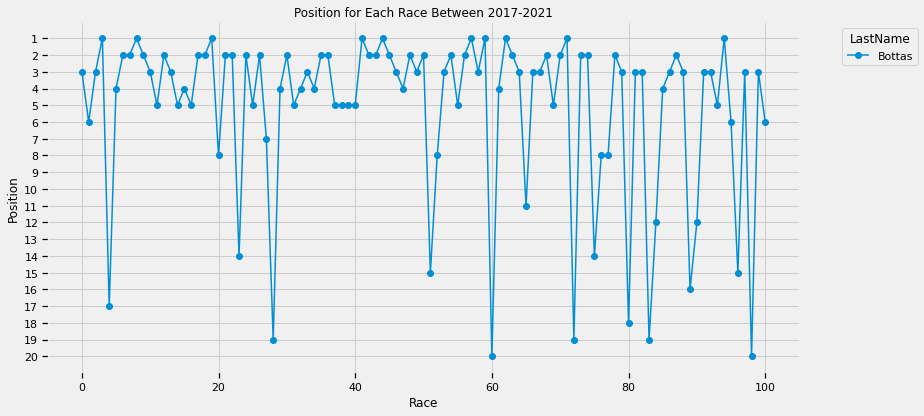

In [15]:
# Filter data for Bottas
bottas_data = all_final_positions[all_final_positions['LastName'] == 'Bottas']

bottas_data = bottas_data.reset_index(drop=True)

# Set up a larger figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot lines for Hamilton and Bottas
plt.plot(bottas_data.index, bottas_data['Position'], label='Bottas', marker='o')

# Invert the y-axis
plt.gca().invert_yaxis()

# Set labels and title
plt.xlabel('Race')
plt.ylabel('Position')
plt.title('Position for Each Race Between 2017-2021')

# Show the legend
plt.legend(title='LastName', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize y-axis ticks
plt.yticks(range(1, (20) + 1))

# Show the plot
plt.show()

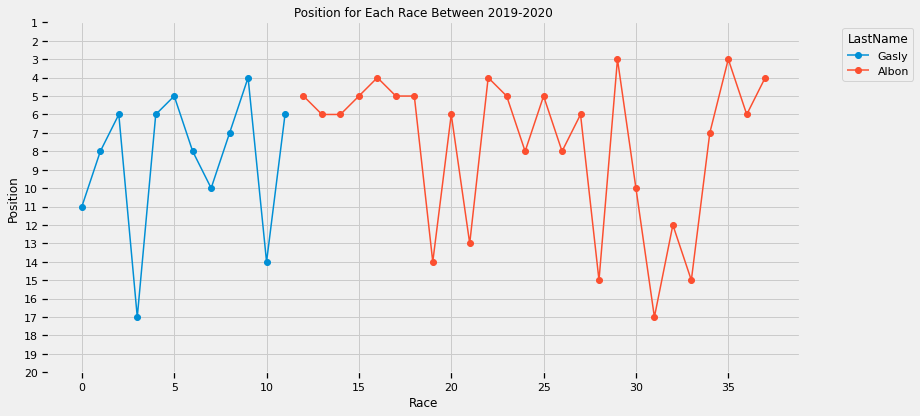

In [16]:
# Filter data for Hamilton

gasly_data = gasly_final_positions.reset_index(drop=True)
albon_data = albon_final_positions.reset_index(drop=True)


# Set the starting index value
starting_index = 12

# Reset the index to start at the specified value
albon_data.index = pd.RangeIndex(starting_index, starting_index + len(albon_data))

# Set up a larger figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot lines for Hamilton and Bottas
plt.plot(gasly_data.index, gasly_data['Position'], label='Gasly', marker='o')
plt.plot(albon_data.index, albon_data['Position'], label='Albon', marker='o')


# Invert the y-axis
plt.gca().invert_yaxis()

# Set labels and title
plt.xlabel('Race')
plt.ylabel('Position')
plt.title('Position for Each Race Between 2019-2020')

# Show the legend
plt.legend(title='LastName', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize y-axis ticks
plt.yticks(range(1, (20) + 1))

# Show the plot
plt.show()